In [1]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
except:
    print('Google Drive is not mounted')

Mounted at /content/drive/


In [3]:
import os
os.chdir('/content/drive/MyDrive/Bert-Files/Bert FineTuning Text Classification')

In [4]:
!ls

bert_fine_tuning.ipynb	   cola_public		model_architecture.txt
bert_named_parameters.txt  cola_public_1.1.zip	vocabulary.txt


In [5]:
import torch
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('There are %d GPU(s) available.'% torch.cuda.device_count())
    print('GPU Name  ',torch.cuda.get_device_name(0))
else:
    print('No GPU availabe')
    device = torch.device('cpu')

No GPU availabe


In [6]:
# device = torch.device('cpu')

In [7]:
%%capture
!pip install transformers

In [8]:
import transformers

In [9]:
%%capture wget_install
!pip install wget

In [10]:
import wget

In [11]:
url = 'https://nyu-mll.github.io/CoLA/cola_public_1.1.zip'

In [12]:
# Download the zip file (if we haven't already)
cola_zip_file_path = 'cola_public_1.1.zip'
if not os.path.exists(cola_zip_file_path):
    wget.download(url,cola_zip_file_path)

In [13]:
import zipfile

In [14]:
import shutil

In [15]:
# unzipping the file
cola_unzip_file_path = ''
if not os.path.exists(cola_unzip_file_path):
    with zipfile.ZipFile(cola_zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(cola_unzip_file_path)

In [16]:
import pandas as pd
df = pd.read_csv(
    'cola_public/raw/in_domain_train.tsv',
    sep='\t',
    header=None,
    names=['sentence_source', 'label', 'label_notes', 'sentence']
)
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

Number of training sentences: 8,551



In [17]:
sentences = df.sentence.values
labels = df.label.values

In [18]:
len(labels),len(sentences)

(8551, 8551)

In [19]:
# printing some samples
import random
[random.choice(sentences) for i in range(5)]

['The mouse nibbled the cheese.',
 'I wonder whether has Mary worked for Microsoft.',
 'The students all enjoyed that summer.',
 'The swing blasted the golf ball across the green.',
 'It seems that Agamemnon is a maniac']

In [20]:
%%capture
from transformers import BertTokenizer,AutoTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case = True)

In [21]:
%%capture
tokenizer2 = AutoTokenizer.from_pretrained('bert-base-cased')

In [22]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [23]:
with open("vocabulary.txt", 'w',encoding="utf-8") as f:
    for token in tokenizer.vocab.keys():
        f.write(token + '\n')

In [ ]:
sample_id = 8
sample_sentence = sentences[sample_id]
tokenz = tokenizer.tokenize(sentences[sample_id])
token_to_ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[sample_id]))
ids_to_token = tokenizer.convert_ids_to_tokens(token_to_ids)
print('sample sentence = ',sample_sentence)
print('tokenz = ',tokenz)
print('token_to_ids = ',token_to_ids)
print('ids_to_token = ',ids_to_token)

sample sentence =  We're dancing the night away.
tokenz =  ['we', "'", 're', 'dancing', 'the', 'night', 'away', '.']
token_to_ids =  [2057, 1005, 2128, 5613, 1996, 2305, 2185, 1012]
ids_to_token =  ['we', "'", 're', 'dancing', 'the', 'night', 'away', '.']


In [ ]:
# steps
# 1. adding special tokens
# 2. padding and truncate
# 3. adding attention masks

In [ ]:
encoded_dict = tokenizer.encode_plus(
    sentences[4],
    truncation=True,
    add_special_tokens = True,
    max_length = 64,
    padding='max_length',
    return_attention_mask = True,
    return_tensors = 'pt',
)

In [ ]:
encoded_dict.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
encoded_dict['input_ids']

tensor([[  101,  2154,  2011,  2154,  1996,  8866,  2024,  2893, 14163,  8024,
          3771,  1012,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]])

In [ ]:
encoded_dict['token_type_ids']

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
encoded_dict['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
len(encoded_dict['attention_mask'][0])

64

In [ ]:
input_ids = []
attention_masks = []
for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens = True,
        max_length = 64,
        truncation=True,
        padding='max_length',
        return_attention_mask = True,
        return_tensors = 'pt'
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

In [ ]:
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

In [ ]:
# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Original:  Our friends won't buy this analysis, let alone the next one we propose.
Token IDs: tensor([  101,  2256,  2814,  2180,  1005,  1056,  4965,  2023,  4106,  1010,
         2292,  2894,  1996,  2279,  2028,  2057, 16599,  1012,   102,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [ ]:
# Print sentence 1, now as a list of IDs.
print('Original: ', sentences[1])
print('Token IDs:', input_ids[1])

Original:  One more pseudo generalization and I'm giving up.
Token IDs: tensor([  101,  2028,  2062, 18404,  2236,  3989,  1998,  1045,  1005,  1049,
         3228,  2039,  1012,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [ ]:
input_ids

tensor([[ 101, 2256, 2814,  ...,    0,    0,    0],
        [ 101, 2028, 2062,  ...,    0,    0,    0],
        [ 101, 2028, 2062,  ...,    0,    0,    0],
        ...,
        [ 101, 2009, 2003,  ...,    0,    0,    0],
        [ 101, 1045, 2018,  ...,    0,    0,    0],
        [ 101, 2054, 2035,  ...,    0,    0,    0]])

In [ ]:
attention_masks

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
from torch.utils.data import random_split,TensorDataset

In [ ]:
# pytorch dataset class instance
dataset = TensorDataset(input_ids,attention_masks,labels)

In [ ]:
dataset[0]

(tensor([  101,  2256,  2814,  2180,  1005,  1056,  4965,  2023,  4106,  1010,
          2292,  2894,  1996,  2279,  2028,  2057, 16599,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0]),
 tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor(1))

In [ ]:
# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{} training samples'.format(train_size))
print('{} validation samples'.format(val_size))

7695 training samples
856 validation samples


In [ ]:
from torch.utils.data import DataLoader,SequentialSampler,RandomSampler

In [ ]:
batch_size = 32

In [ ]:
train_dataloader = DataLoader(
    train_dataset,
    sampler = RandomSampler(train_dataset),
    batch_size = batch_size
)

validation_dataloader = DataLoader(
    val_dataset,
    sampler = SequentialSampler(val_dataset),
    batch_size = batch_size
)

In [ ]:
from transformers import BertForSequenceClassification,AdamW,BertConfig

In [ ]:
import warnings

In [ ]:
%%capture
warnings.filterwarnings('ignore')
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=2,
    output_attentions = False,
    output_hidden_states = False
)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
with open('model_architecture.txt','w') as file:
    file.write(str(model.to(device)))

In [ ]:
model_parameters = list(model.named_parameters())

In [ ]:
with open('bert_named_parameters.txt','w') as file:
    for i in model_parameters:
        name = i[0]
        shape = tuple(i[1].shape)
        # print(name,':',shape)
        file.write(name+' : '+str(shape)+'\n')

In [ ]:
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5, # args.learning_rate - default is 5e-5
    eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
)

In [ ]:
from transformers import get_linear_schedule_with_warmup

In [ ]:
epochs = 5
total_steps = len(train_dataloader)*epochs
print('total steps = ',total_steps)

total steps =  1205


In [ ]:
len(train_dataloader)

241

In [ ]:
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(levelname)s:%(name)s:%(message)s')
file_handler = logging.FileHandler('training.log')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [ ]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


training_stats = []
total_t0 = time.time()
for epoch_i in range(0, epochs):
    logger.info("")
    logger.info('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    logger.info('Training...')
    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        # if step % 40 == 0 and not step == 0:
        elapsed = format_time(time.time() - t0)
        logger.info('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(
            step, len(train_dataloader), elapsed)
        )
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()
        result = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            labels=b_labels,
            return_dict=True
        )
        loss = result.loss
        logits = result.logits
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    training_time = format_time(time.time() - t0)

    logger.info("")
    logger.info("  Average training loss: {0:.2f}".format(avg_train_loss))
    logger.info("  Training epcoh took: {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================


    logger.info("")
    logger.info("Running Validation...")
    t0 = time.time()
    model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        with torch.no_grad():
            result = model(
                b_input_ids,
                token_type_ids=None,
                attention_mask=b_input_mask,
                labels=b_labels,
                return_dict=True
            )
        loss = result.loss
        logits = result.logits

        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        total_eval_accuracy += flat_accuracy(logits, label_ids)


    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    logger.info("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    avg_val_loss = total_eval_loss / len(validation_dataloader)

    validation_time = format_time(time.time() - t0)

    logger.info("  Validation Loss: {0:.2f}".format(avg_val_loss))
    logger.info("  Validation took: {:}".format(validation_time))
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

logger.info("")
logger.info("Training complete!")
logger.info("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

INFO:__main__:
INFO:__main__:======== Epoch 1 / 5 ========
INFO:__main__:Training...
INFO:__main__:  Batch     0  of    241.    Elapsed: 0:00:00.
INFO:__main__:  Batch     1  of    241.    Elapsed: 0:00:03.
INFO:__main__:  Batch     2  of    241.    Elapsed: 0:00:03.
INFO:__main__:  Batch     3  of    241.    Elapsed: 0:00:04.
INFO:__main__:  Batch     4  of    241.    Elapsed: 0:00:04.
INFO:__main__:  Batch     5  of    241.    Elapsed: 0:00:04.
INFO:__main__:  Batch     6  of    241.    Elapsed: 0:00:05.
INFO:__main__:  Batch     7  of    241.    Elapsed: 0:00:05.
INFO:__main__:  Batch     8  of    241.    Elapsed: 0:00:05.
INFO:__main__:  Batch     9  of    241.    Elapsed: 0:00:06.
INFO:__main__:  Batch    10  of    241.    Elapsed: 0:00:06.
INFO:__main__:  Batch    11  of    241.    Elapsed: 0:00:06.
INFO:__main__:  Batch    12  of    241.    Elapsed: 0:00:06.
INFO:__main__:  Batch    13  of    241.    Elapsed: 0:00:07.
INFO:__main__:  Batch    14  of    241.    Elapsed: 0:00:07.


In [ ]:
import pandas as pd
# pd.set_option('precision', 2)
df_stats = pd.DataFrame(data=training_stats)
df_stats = df_stats.set_index('epoch')
df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.490228,0.485682,0.793981,0:01:19,0:00:03
2,0.305561,0.482738,0.819444,0:01:22,0:00:03
3,0.189159,0.495514,0.819444,0:01:20,0:00:03
4,0.122274,0.648719,0.822917,0:01:20,0:00:03
5,0.089900,0.732846,0.826389,0:01:20,0:00:03


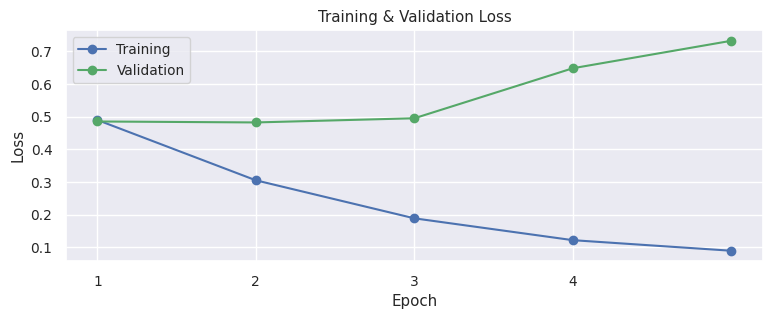

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

# sns.set(font_scale=0.9)
plt.rcParams["figure.figsize"] = (9,3)

plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

In [ ]:
# test data preparation

df = pd.read_csv(
    "./cola_public/raw/out_of_domain_dev.tsv",
    delimiter='\t',
    header=None,
    names=['sentence_source', 'label', 'label_notes', 'sentence']
)

print('Number of test sentences: {:,}\n'.format(df.shape[0]))

sentences = df.sentence.values
labels = df.label.values

input_ids = []
attention_masks = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens = True,
        max_length = 64,
        padding='max_length',
        return_attention_mask = True,
        return_tensors = 'pt',
    )

    input_ids.append(encoded_dict['input_ids'])

    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

batch_size = 32

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(
    prediction_data,
    sampler=prediction_sampler,
    batch_size=batch_size
)

Number of test sentences: 516



In [ ]:
# Prediction on test set
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        result = model(
            b_input_ids,
            token_type_ids=None,
            attention_mask=b_input_mask,
            return_dict=True
        )

    logits = result.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    predictions.append(logits)
    true_labels.append(label_ids)

print('DONE')

Predicting labels for 516 test sentences...
DONE


In [ ]:
true_labels

[array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 1]),
 array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 1, 1, 1, 1]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 0]),
 array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 0, 1]),
 array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 

In [ ]:
predictions

[array([[-2.7848868,  2.7896404],
        [-2.8029604,  2.569037 ],
        [-2.834444 ,  2.8725631],
        [-2.578644 ,  2.4051085],
        [-2.5935774,  2.4850588],
        [-2.8714685,  2.873549 ],
        [-1.1732477,  0.9424905],
        [-2.7022858,  2.414427 ],
        [-2.975491 ,  2.860155 ],
        [-2.8501847,  2.85743  ],
        [-2.0321589,  1.7560546],
        [ 1.4650439, -1.6817982],
        [-2.6011887,  2.4997668],
        [-2.286168 ,  1.9988546],
        [-2.431228 ,  2.3025174],
        [-2.2718136,  2.1328466],
        [-2.7374463,  2.419418 ],
        [ 2.3499365, -2.1677916],
        [-2.3307683,  2.216689 ],
        [-2.0721712,  1.8892705],
        [-2.3307683,  2.216689 ],
        [-1.9856576,  1.7921885],
        [-2.0153913,  1.8405834],
        [-2.7689366,  2.7716823],
        [-2.0689983,  1.8949348],
        [-2.7913601,  2.735976 ],
        [-2.5850296,  2.4265428],
        [-2.824054 ,  2.6023402],
        [-2.867865 ,  2.6760375],
        [-2.49

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_set = []
print('Calculating Matthews Corr. Coef. for each batch...')

for i in range(len(true_labels)):

    # The predictions for this batch are a 2-column ndarray (one column for "0"
    # and one column for "1"). Pick the label with the highest value and turn this
    # in to a list of 0s and 1s.
    pred_labels_i = np.argmax(predictions[i], axis=1).flatten()

    # Calculate and store the coef for this batch.
    matthews = matthews_corrcoef(true_labels[i], pred_labels_i)
    matthews_set.append(matthews)

Calculating Matthews Corr. Coef. for each batch...


In [ ]:
print(matthews_set)

[0.049286405809014416, -0.050964719143762556, 0.4040950971038548, 0.34151450937027694, 0.3567530340063379, 0.7410010097502685, 0.5269860393922079, 0.47519096331149147, 0.8333333333333334, 0.7704873741021288, 0.7679476477883045, 0.8333333333333334, 0.8150678894028793, 0.7141684885491869, 0.3268228676411533, 0.5266354311522131, 0.0]


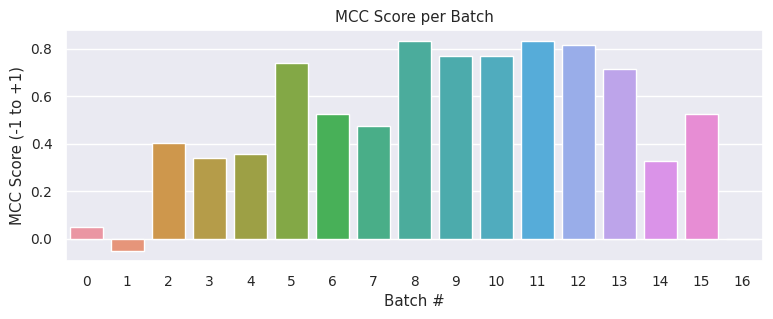

In [ ]:
# Create a barplot showing the MCC score for each batch of test samples.
import seaborn as sns
ax = sns.barplot(x=list(range(len(matthews_set))), y=matthews_set, ci=None)

plt.title('MCC Score per Batch')
plt.ylabel('MCC Score (-1 to +1)')
plt.xlabel('Batch #')

plt.show()

In [ ]:
# Combine the results across all batches.
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('Total MCC: %.3f' % mcc)

Total MCC: 0.540


In [ ]:
concatenated_predictions = np.concatenate(predictions, axis=0)
concatenated_predictions

array([[-2.7848868,  2.7896404],
       [-2.8029604,  2.569037 ],
       [-2.834444 ,  2.8725631],
       ...,
       [-3.0952032,  3.0442026],
       [-2.8736362,  2.8392668],
       [-3.123673 ,  2.9908707]], dtype=float32)

In [ ]:
flat_true_labels

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [ ]:
flat_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,

In [ ]:
output_dir = './saved_model'
# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

Saving model to ./saved_model


In [ ]:
# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`

# Take care of distributed/parallel training
model_to_save = model.module if hasattr(model, 'module') else model
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('./saved_model/tokenizer_config.json',
 './saved_model/special_tokens_map.json',
 './saved_model/vocab.txt',
 './saved_model/added_tokens.json')

In [ ]:
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))

In [ ]:
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = AutoTokenizer.from_pretrained(output_dir)

# Copy the model to the GPU.
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# single prediction

In [ ]:
test_sentence = sentences[1]
test_sentence

"They claimed they had settled on something, but it wasn't clear what they had settled on."

In [ ]:
tokenizer.encode_plus(test_sentence)

{'input_ids': [101, 2027, 3555, 2027, 2018, 3876, 2006, 2242, 1010, 2021, 2009, 2347, 1005, 1056, 3154, 2054, 2027, 2018, 3876, 2006, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
encoded_dict = tokenizer.encode_plus(
        test_sentence,
        add_special_tokens = True,
        max_length = 64,
        padding='max_length',
        return_attention_mask = True,
        return_tensors = 'pt',
    )

In [ ]:
encoded_dict['input_ids'].to('cpu')
encoded_dict['token_type_ids'].to('cpu')
encoded_dict['attention_mask'].to('cpu')

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
model.to('cpu')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# prediction for a single input
with torch.no_grad():
    result = model(
        encoded_dict['input_ids'],
        token_type_ids=None,
        attention_mask=encoded_dict['attention_mask'],
        return_dict=True
    )
    logits = result.logits
    print('result = {}'.format(result))
    logits = logits.detach().cpu().numpy()
    print('logits = {}'.format(logits))

result = SequenceClassifierOutput(loss=None, logits=tensor([[-2.8030,  2.5690]]), hidden_states=None, attentions=None)
logits = [[-2.8029602  2.5690367]]
